In [7]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Del 2: Godkänt

In [8]:
area_data = pd.read_csv('area_price.csv')
area_data.head()

,sqft_living,price
0,1340,313000.0
1,3650,2384000.0
2,1930,342000.0
3,2000,420000.0
4,1940,550000.0


In [9]:
area_data.describe()

,sqft_living,price
count,4600.000000,4.600000e+03
mean,2139.346957,5.519630e+05
std,963.206916,5.638347e+05
min,370.000000,0.000000e+00
25%,1460.000000,3.228750e+05
50%,1980.000000,4.609435e+05
75%,2620.000000,6.549625e+05
max,13540.000000,2.659000e+07


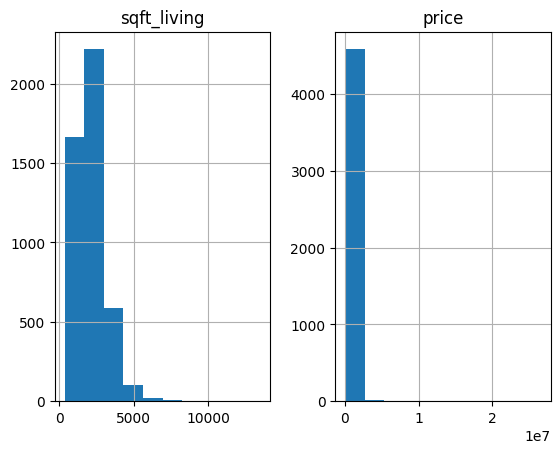

In [10]:
area_data.hist()
plt.show()

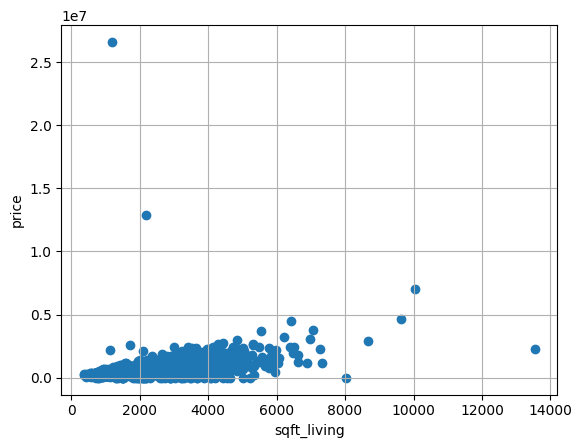

In [11]:
def scatter_2d(df: pd.DataFrame) -> None:
    x = df.keys()[0]
    y = df.keys()[1]
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid()

scatter_2d(area_data)
plt.show()

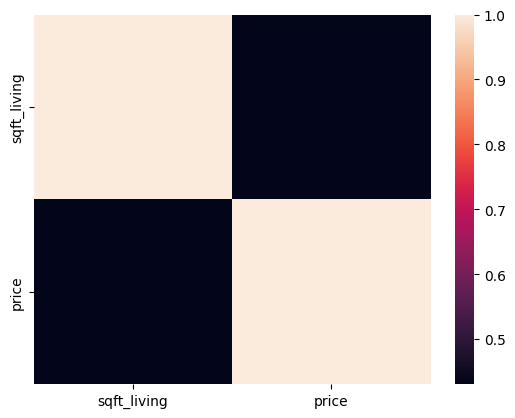

In [12]:
sns.heatmap(area_data.corr())
plt.show()

In [13]:
valid_area_data = area_data.loc[(area_data['price'] > 0) & (area_data['price'] < 6000000)]
trimmed_area_data = valid_area_data.loc[valid_area_data['sqft_living'] < 10000]
# trimmed_area_data = trimmed_area_data.loc[~((trimmed_area_data['sqft_living'] > 5000) & (trimmed_area_data['price'] < 500000))]
# trimmed_area_data = trimmed_area_data.loc[~((trimmed_area_data['sqft_living'] > 6500) & (trimmed_area_data['price'] < 1500000))]
trimmed_area_data.describe()


,sqft_living,price
count,4547.000000,4.547000e+03
mean,2128.321091,5.476574e+05
std,933.834111,3.544859e+05
min,370.000000,7.800000e+03
25%,1460.000000,3.260500e+05
50%,1970.000000,4.650000e+05
75%,2610.000000,6.570500e+05
max,9640.000000,4.668000e+06


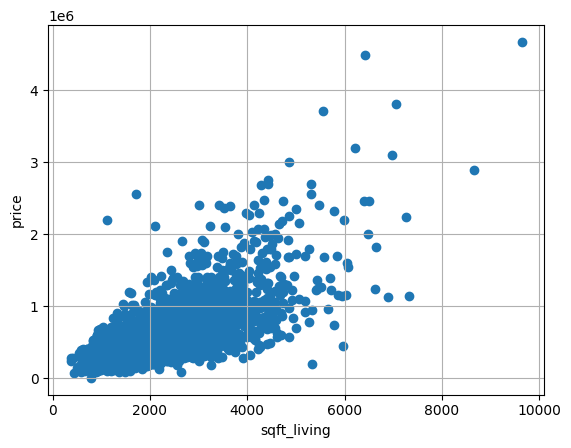

In [14]:
scatter_2d(trimmed_area_data)
plt.show()

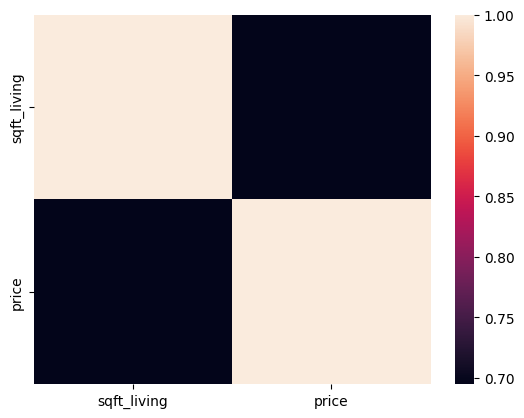

In [15]:
sns.heatmap(trimmed_area_data.corr())
plt.show()


In [16]:
x = trimmed_area_data['sqft_living']
y = trimmed_area_data['price']

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size = 0.7,
                                                    random_state = 309
                                                    )


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(3182,)
(3182,)
(1365,)
(1365,)


In [18]:
x_train = x_train.array.reshape(-1,1)


In [19]:
y_train = y_train.array.reshape(-1,1)

In [20]:
x_test = x_test.array.reshape(-1,1)

In [21]:
y_test = y_test.array.reshape(-1,1)

In [22]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [23]:
print('Train score:', lr.score(x_train, y_train))
print('Test score', lr.score(x_test, y_test))

Train score: 0.4686187416669786
Test score 0.5151169551977517


In [24]:
reg_line = lr.predict(np.arange(0, 15000).reshape(-1,1))

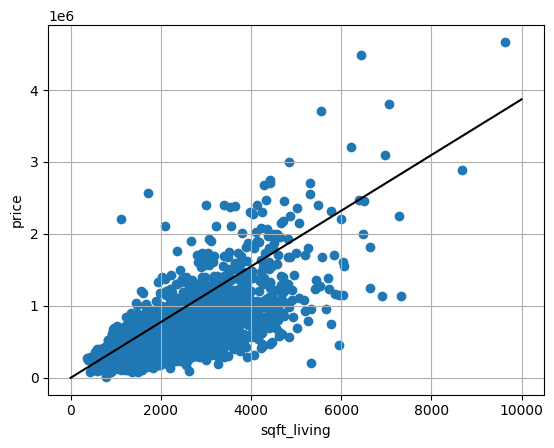

In [25]:
scatter_2d(trimmed_area_data)
plt.plot([0,10000], [reg_line[0],reg_line[-1]], color = 'black')
plt.show()

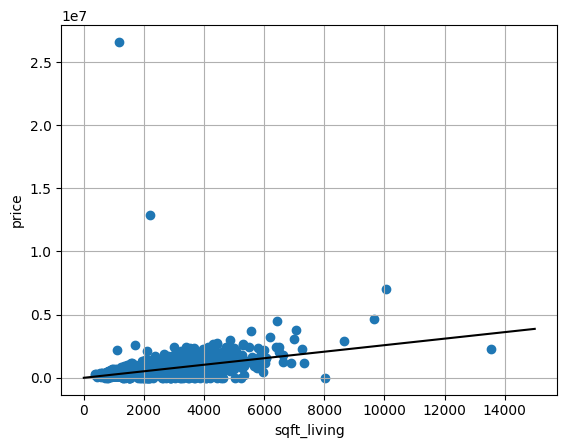

In [26]:
scatter_2d(area_data)
plt.plot([0,15000], [reg_line[0],reg_line[-1]], color = 'black')
plt.show()

# Del 3: Väl Godkänt

In [27]:
house_data = pd.read_csv('house_price.csv')
house_data.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA
2,2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,USA
3,3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA
4,4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA


In [28]:
house_data.describe()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4598.000000,4.598000e+03,4598.000000,4598.000000,4598.000000,4.598000e+03,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,2298.608960,5.436148e+05,3.401044,2.160776,2139.544585,1.485480e+04,1.512288,0.007177,0.240757,3.451718,1827.466507,312.078077,1970.784906,808.524793
std,1327.651126,3.705838e+05,0.909007,0.783932,963.312203,3.589205e+04,0.538299,0.084422,0.778558,0.677296,862.293944,464.190168,29.735870,979.397082
min,0.000000,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,1149.250000,3.226250e+05,3.000000,1.750000,1460.000000,5.000250e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,2298.500000,4.604435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,3447.750000,6.537500e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,4599.000000,7.062500e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


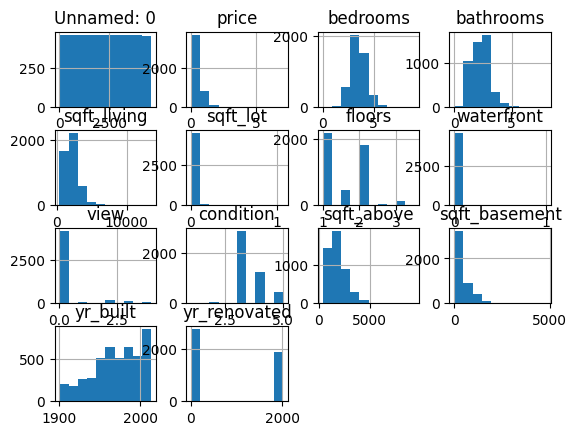

In [29]:
house_data.hist()
plt.show()

In [30]:
location_data = house_data.loc[:,'city':]
numeric_data = house_data.loc[:,'price':'yr_renovated']

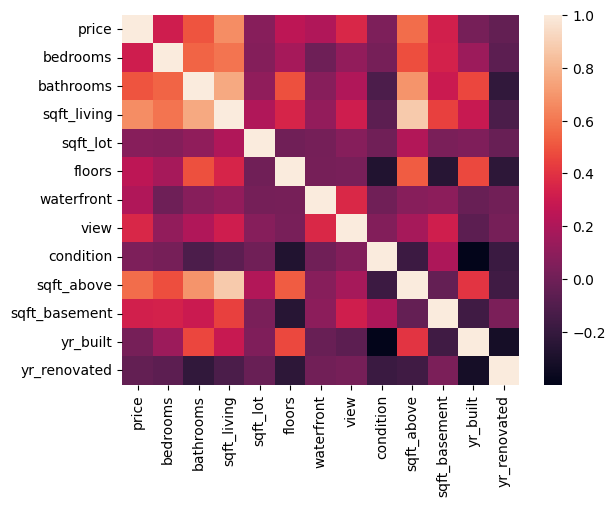

In [31]:
sns.heatmap(numeric_data.corr())
plt.show()

In [32]:
numeric_data = numeric_data.loc[numeric_data['price'] > 0]
numeric_data.count()

price            4549
bedrooms         4549
bathrooms        4549
sqft_living      4549
sqft_lot         4549
floors           4549
waterfront       4549
view             4549
condition        4549
sqft_above       4549
sqft_basement    4549
yr_built         4549
yr_renovated     4549
dtype: int64

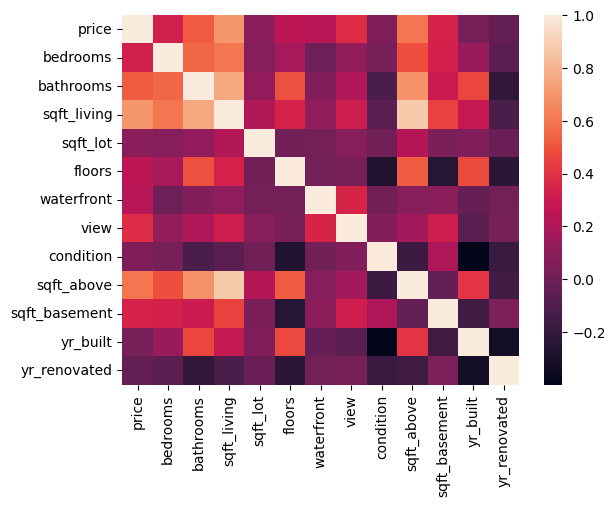

In [33]:
sns.heatmap(numeric_data.corr())
plt.show()

In [34]:
def pca_transformation(df: pd.DataFrame):
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df)
    principal_df = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
    return principal_df

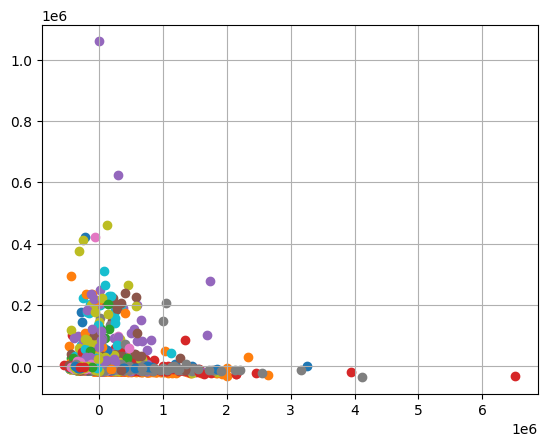

In [35]:
numeric_pca = pca_transformation(numeric_data)

col = 'city'
x = numeric_pca.keys()[0]
y = numeric_pca.keys()[1]
for val in location_data[col].unique():
    plt.scatter(numeric_pca.loc[house_data[col] == val, x],
                numeric_pca.loc[house_data[col] == val, y])
plt.grid()
plt.show()